In [1]:
import os
import cv2
import random
import numpy as np 
import pandas as pd 
from glob import glob 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
image_folder_path = "/data1/xray_data/images"
all_image_paths = glob(f"{image_folder_path}/*.png")
df = pd.read_csv('dataset/BBox_List_2017.csv')

In [4]:
all_image_paths[:5]

['/data1/xray_data/images/00021766_007.png',
 '/data1/xray_data/images/00006385_000.png',
 '/data1/xray_data/images/00009636_000.png',
 '/data1/xray_data/images/00023297_008.png',
 '/data1/xray_data/images/00013988_002.png']

In [5]:
df = df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis = 1)
df = df.rename(columns={"Bbox [x": "x", "h]": "h"})
df.head(5)

,Image Index,Finding Label,x,y,w,h
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


In [9]:
df["Finding Label"].value_counts()

Finding Label
Atelectasis     180
Nodule/Mass     164
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Name: count, dtype: int64

<Axes: xlabel='Finding Label'>

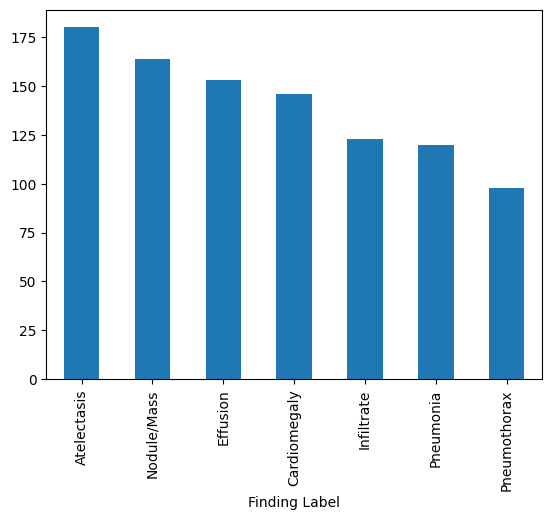

In [10]:
df["Finding Label"].value_counts().plot(kind='bar')

In [8]:
#merge this two classes to connect with other dataset 
df.loc[df["Finding Label"] == "Mass", "Finding Label"] = "Nodule/Mass"
df.loc[df["Finding Label"] == "Nodule", "Finding Label"] = "Nodule/Mass"

In [11]:
# make numerical labels from text labels
le = LabelEncoder()
df["label"] = le.fit_transform(df["Finding Label"].values)

In [12]:
df.sample(5)

,Image Index,Finding Label,x,y,w,h,label
826,00007735_018.png,Pneumonia,584.059259,421.519577,209.134392,295.822222,5
280,00016414_000.png,Cardiomegaly,385.760847,430.188360,571.056085,449.693122,1
391,00016417_008.png,Effusion,785.608466,253.561905,182.044444,619.817989,2
85,00010575_002.png,Atelectasis,232.973545,604.647619,234.057143,158.205291,0
747,00011136_002.png,Pneumonia,574.008889,574.900156,229.831111,166.115556,5


## Lets visualize every class

In [13]:
def visualize_labels(n, label_idx):
    fig, axs = plt.subplots(1, n, figsize=(15, 15))

    labels = df["Finding Label"].unique()
    label = labels[label_idx]
    df_filtered = df[df['Finding Label'] == label]

    random_indices = np.random.choice(len(df_filtered), n, replace=False)

    for i, index in enumerate(random_indices):
        image_name = df_filtered.iloc[index, 0]
        x, y, w, h = df_filtered.iloc[index, 2], df_filtered.iloc[index, 3], df_filtered.iloc[index, 4], df_filtered.iloc[index, 5]

        image = cv2.imread(os.path.join(image_folder_path, image_name))
        cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        axs[i].imshow(image_rgb)
        axs[i].set_title(f'Label: {label}')
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

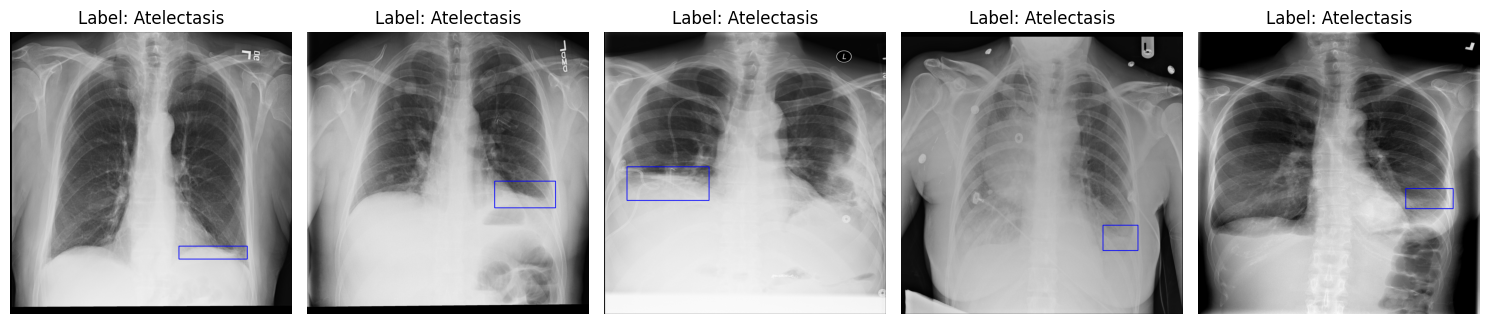

In [14]:
visualize_labels(5, 0)

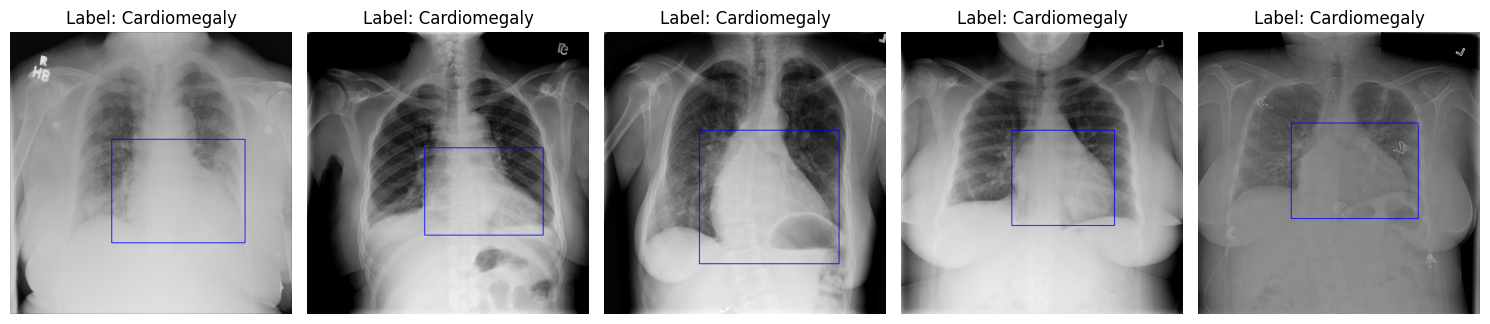

In [15]:
visualize_labels(5, 1)

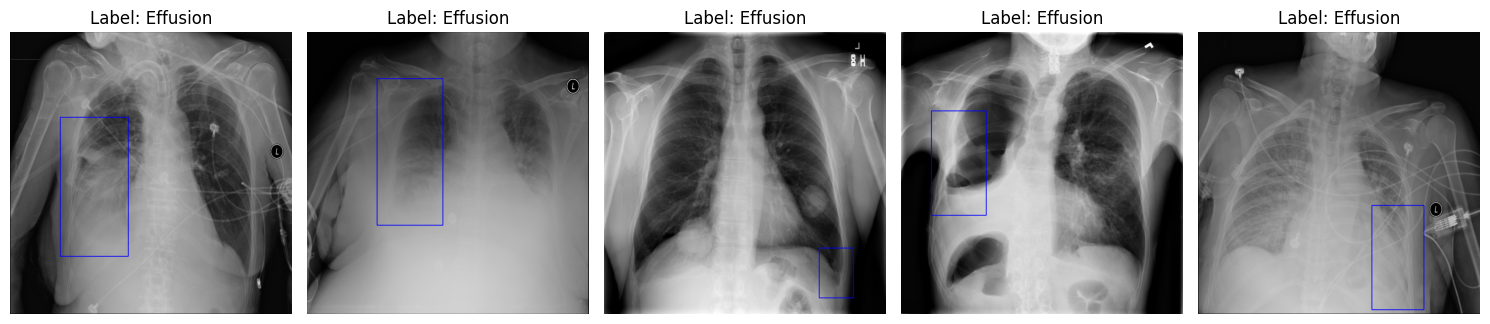

In [16]:
visualize_labels(5, 2)

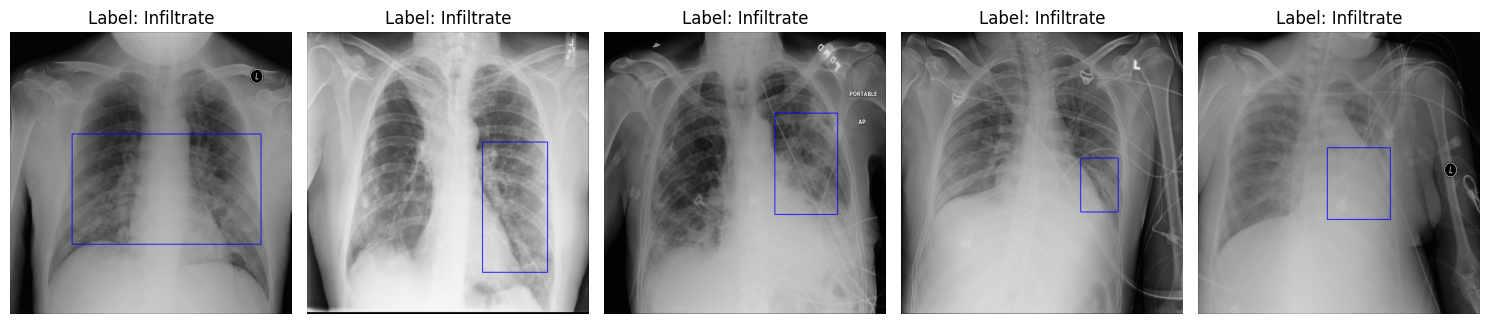

In [17]:
visualize_labels(5, 3)

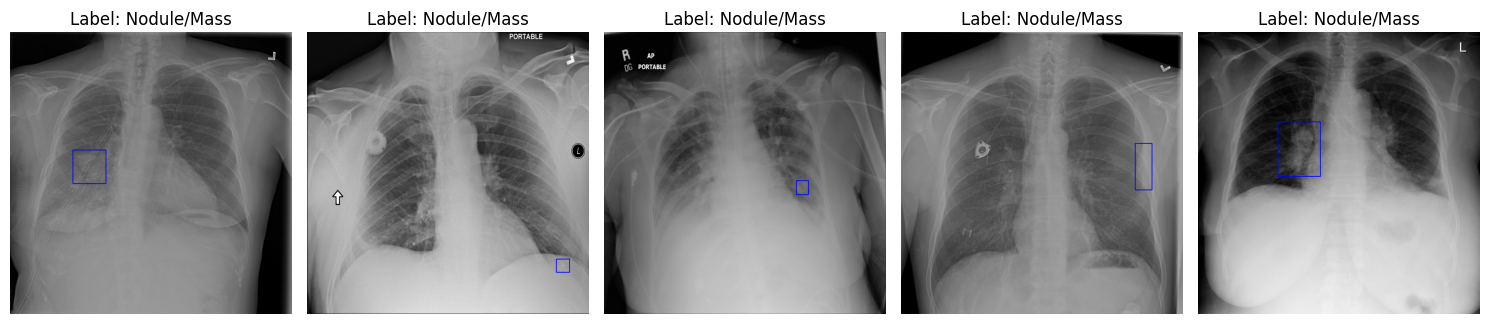

In [18]:
visualize_labels(5, 4)

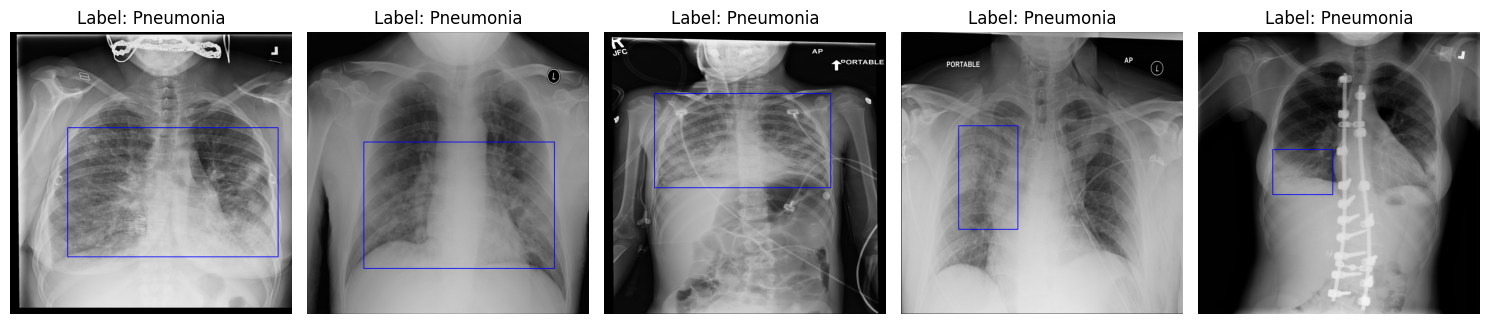

In [19]:
visualize_labels(5, 5)

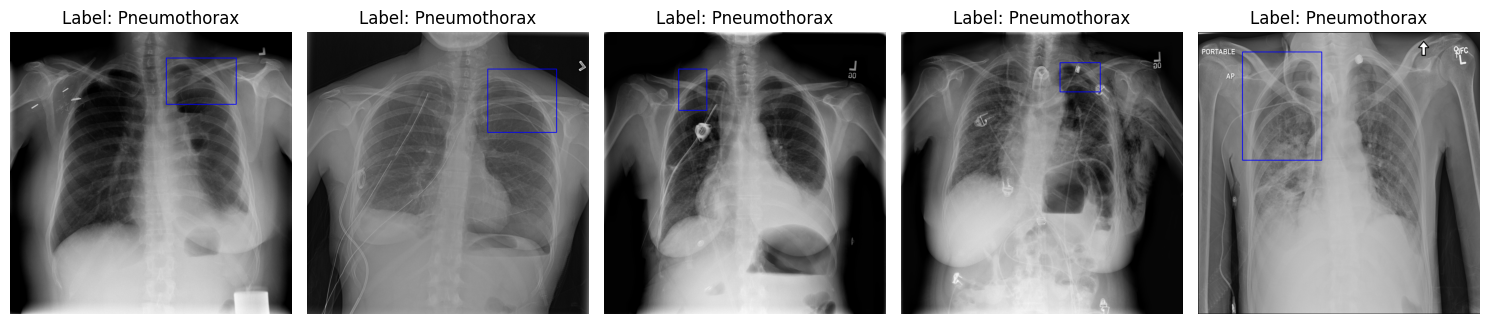

In [20]:
visualize_labels(5, 6)

# train val stratified split


In [22]:
df_y = df.label
X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size = 0.15,  stratify=df_y)

In [23]:
X_test.to_csv("dataset/val_df.csv")

In [24]:
X_train.to_csv("dataset/train_df.csv")

In [25]:
X_train.loc[0]

Image Index      00013118_008.png
Finding Label         Atelectasis
x                      225.084746
y                      547.019217
w                       86.779661
h                       79.186441
label                           0
Name: 0, dtype: object